In [1]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Database Connection Parameters
disease_checker = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Alayande1$',
    'database': 'disease_checker',
}


#Connecting to the SQL Database
conn = pymysql.connect(**disease_checker)

In [3]:
ebola_query = "SELECT * FROM ebola"

In [4]:
ebola_df = pd.read_sql(ebola_query, conn)

C:\Users\PC\AppData\Local\Temp\ipykernel_10444\3272076906.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ebola_df = pd.read_sql(ebola_query, conn)


In [5]:
ebola_df = ebola_df.replace({'Yes': 1, 'No': 2, 'Male': 1, 'Female': 2, 'High': 1, 'Medium': 2, 'Low': 3, 'Negative': 4, 'Critical': 5})

In [6]:
correlation_matrix = ebola_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                    id    Gender   fatigue     Fever  Hemorrhaging  Headache  \
id            1.000000 -0.006663  0.016688  0.005742      0.015098 -0.005496   
Gender       -0.006663  1.000000 -0.017416  0.023332     -0.021290 -0.011415   
fatigue       0.016688 -0.017416  1.000000  0.006962     -0.012878  0.004964   
Fever         0.005742  0.023332  0.006962  1.000000      0.011903 -0.017393   
Hemorrhaging  0.015098 -0.021290 -0.012878  0.011903      1.000000  0.020069   
Headache     -0.005496 -0.011415  0.004964 -0.017393      0.020069  1.000000   
Sore_Throat   0.004289 -0.016096 -0.006882  0.012297      0.005967  0.008473   
Skin_Rash     0.003055 -0.015084 -0.009098 -0.005067     -0.017958 -0.002891   
Vomiting      0.002984  0.001869  0.025440  0.019109      0.003697  0.000194   
Severity      0.005301  0.005049  0.117339  0.119157      0.119075  0.102061   

              Sore_Throat  Skin_Rash  Vomiting  Severity  
id               0.004289   0.003055  0.002984  0.005301  
G

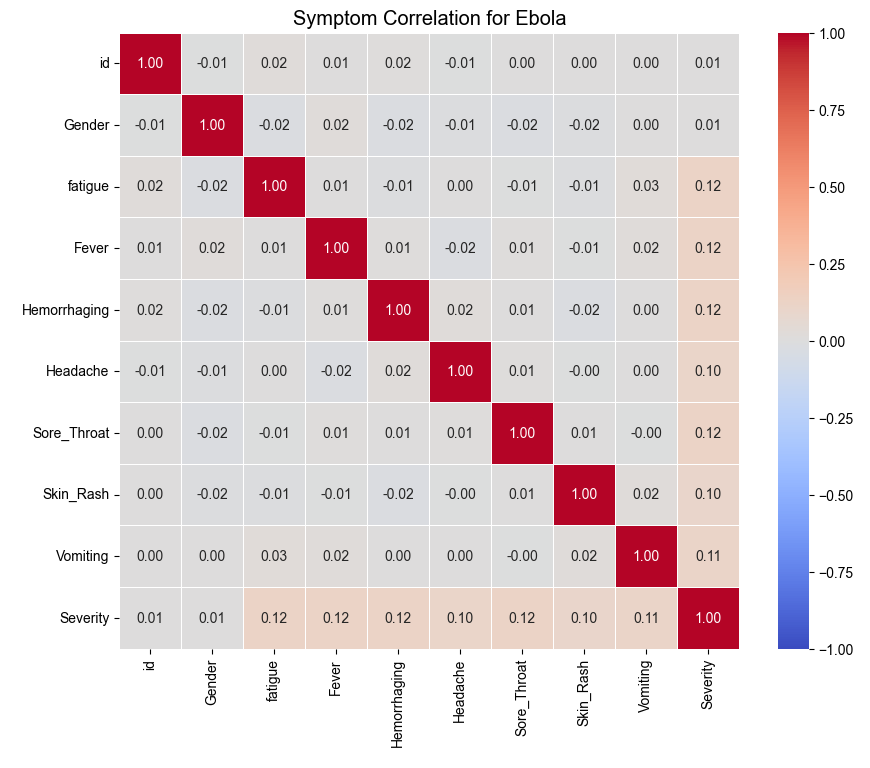

In [7]:
plt.figure(figsize=(10, 8), dpi=100)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)

# Set the font size for the numbers
sns.set(font_scale=1.2)

# Set a title for the heatmap
plt.title("Symptom Correlation for Ebola")

# Show the heatmap
plt.show()